# 시계열자료분석

##CH05 확률과정

In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [6]:
library(forecast)

### 정상시계열

In [7]:
z=rnorm(200)

In [8]:
(a=c(1,2,3))

[1] 1 2 3

In [9]:
data.table::shift(a,2)

[1] NA NA  1

- a를 2만큼 옆으로 미룸

In [10]:
cor(z,data.table::shift(z,1))

[1] NA

- 미루면서 na값이 존재하여 correlation이 0이 나옴

In [11]:
cor(z,data.table::shift(z,1),use='pairwise.complete.obs')

[1] 0.08329477

- use='pairwise.complete.obs' 옵션을 넣어줌으로써 na값 발생X

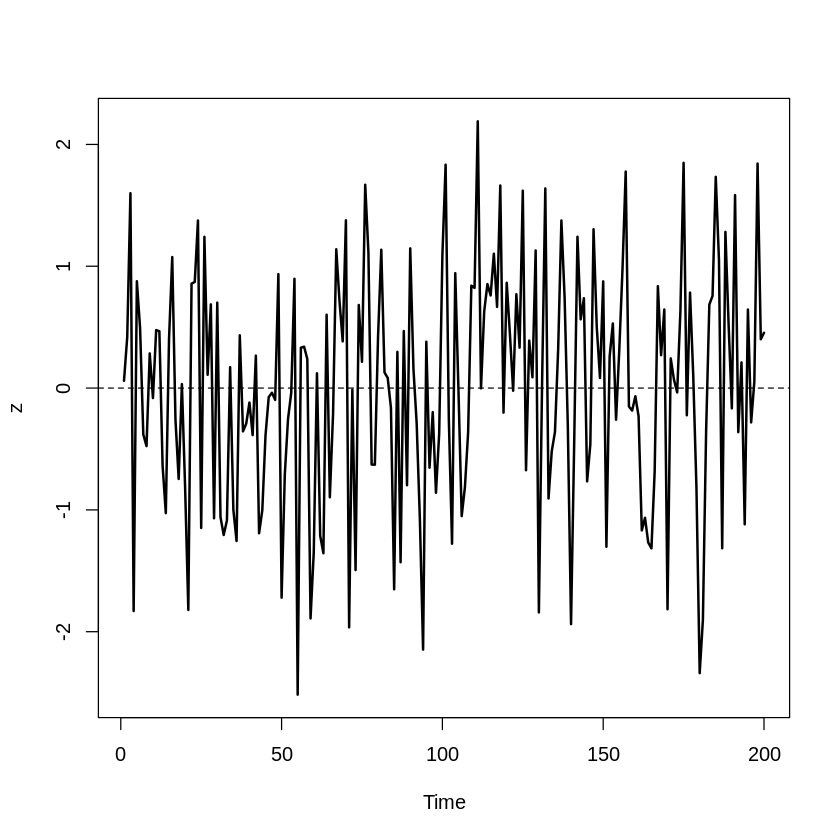

In [12]:
plot.ts(z,lwd=2)
abline(h=0,lty=2)

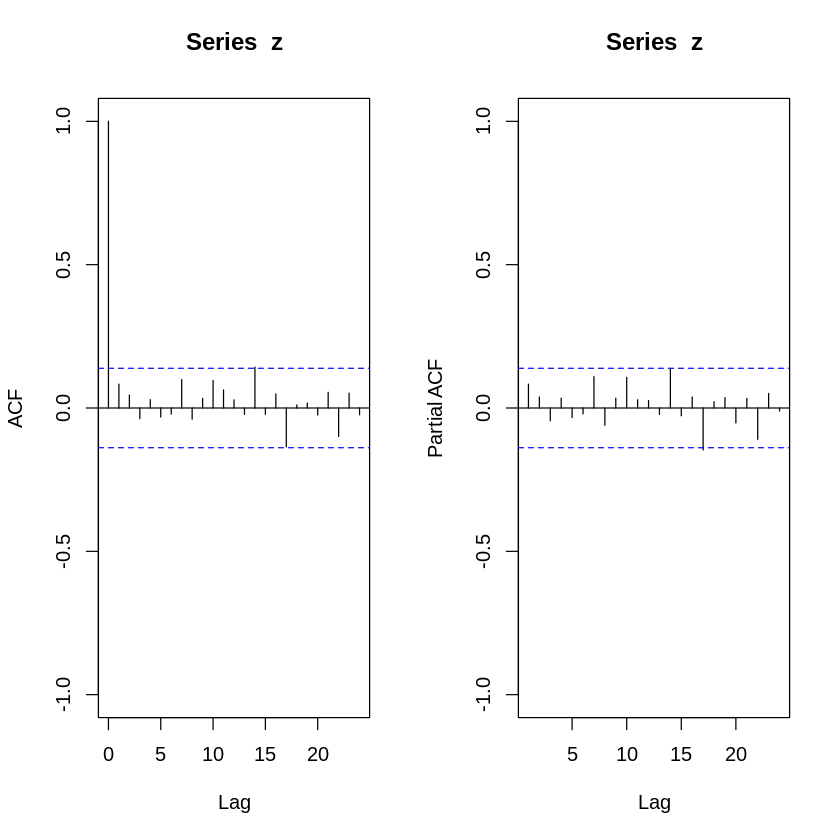

In [13]:
par(mfrow=c(1,2))
acf(z,ylim=c(-1,1),lag.max=24)
pacf(z,ylim=c(-1,1),lag.max=24)

- lag.max값으로 가로축의 길이를 조절할 수 있음

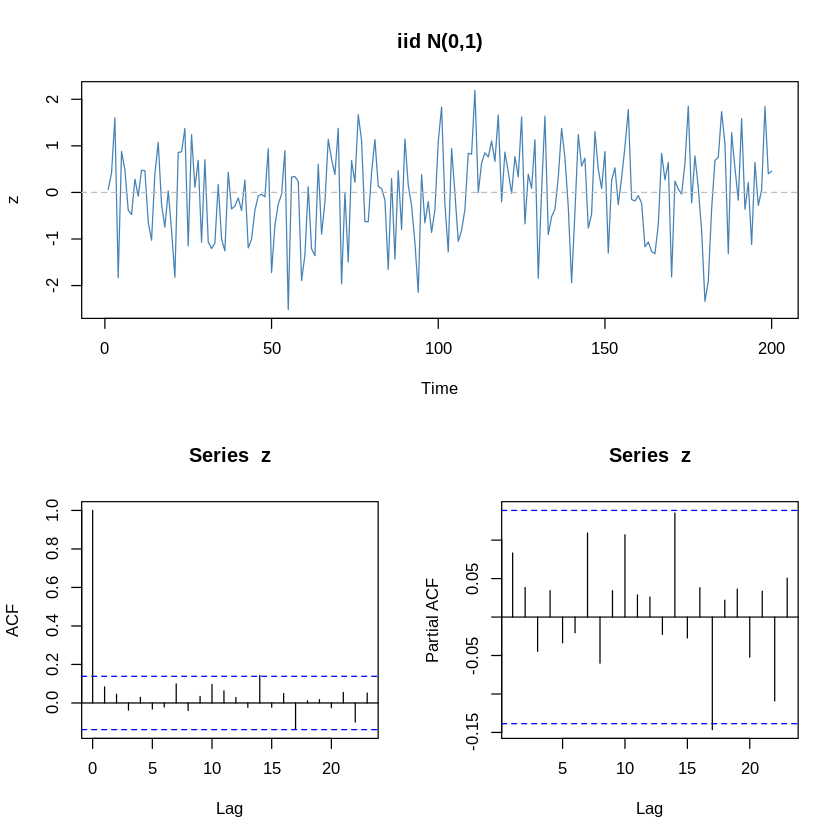

In [15]:
layout(matrix(c(1,1,2,3),2,2,byrow=TRUE))
plot.ts(z,col="steelblue",main=paste0('iid N(0,1)'))
abline(h=0,col='grey',lty=2)
acf(z)
pacf(z)
graphics.off()

- 한꺼번에 그리기위해..

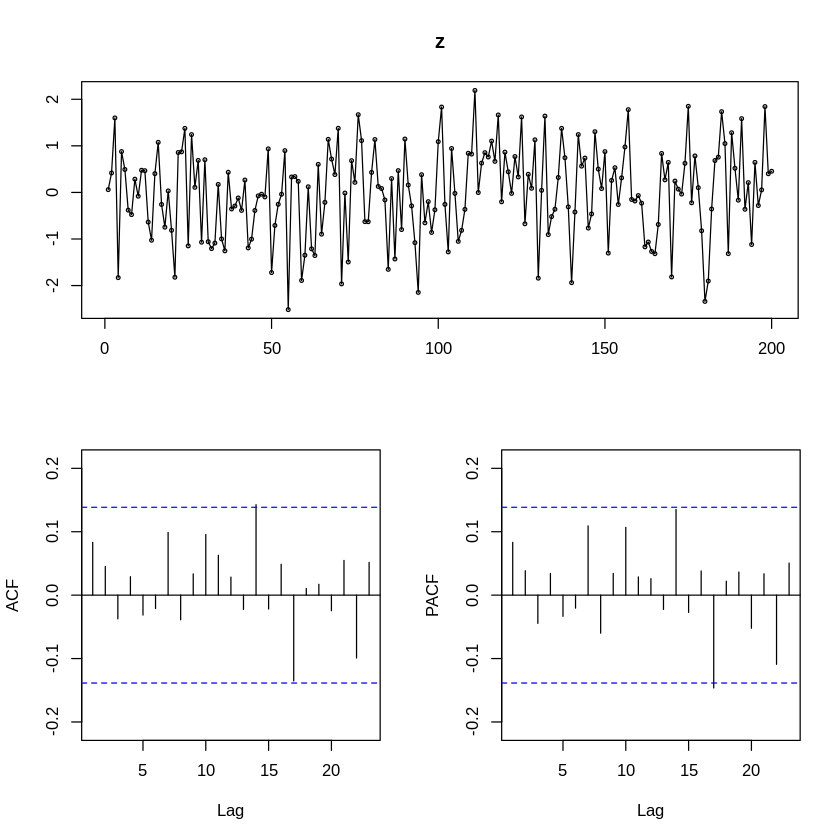

In [16]:
forecast::tsdisplay(z)

- tsdisplay 함수 사용하면 한꺼번에 그릴 수 있음

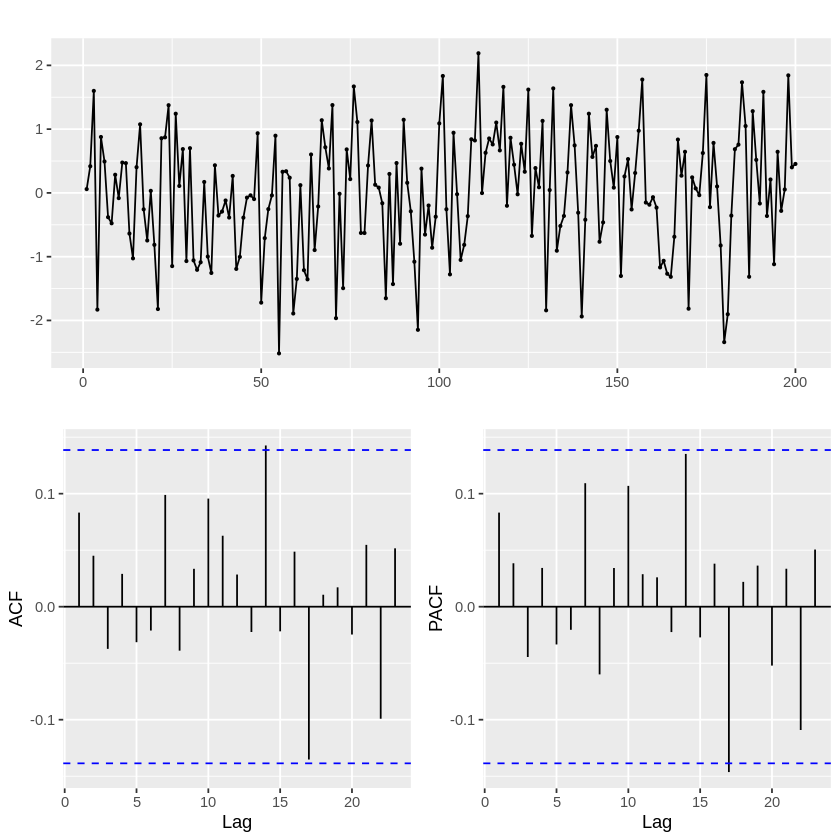

In [17]:
forecast::ggtsdisplay(z)

- ggplot 형태로

### 확률보행과정

$Z_t=Z_{t-1}+ϵ_t=ϵ_1+ϵ_2+...+ϵ_t,\; ϵ ~ WN(0,σ^2)$

In [19]:
a
cumsum(a)

[1] 1 2 3

[1] 1 3 6

- cumsum을 통해 누적합을 구할 수 있음

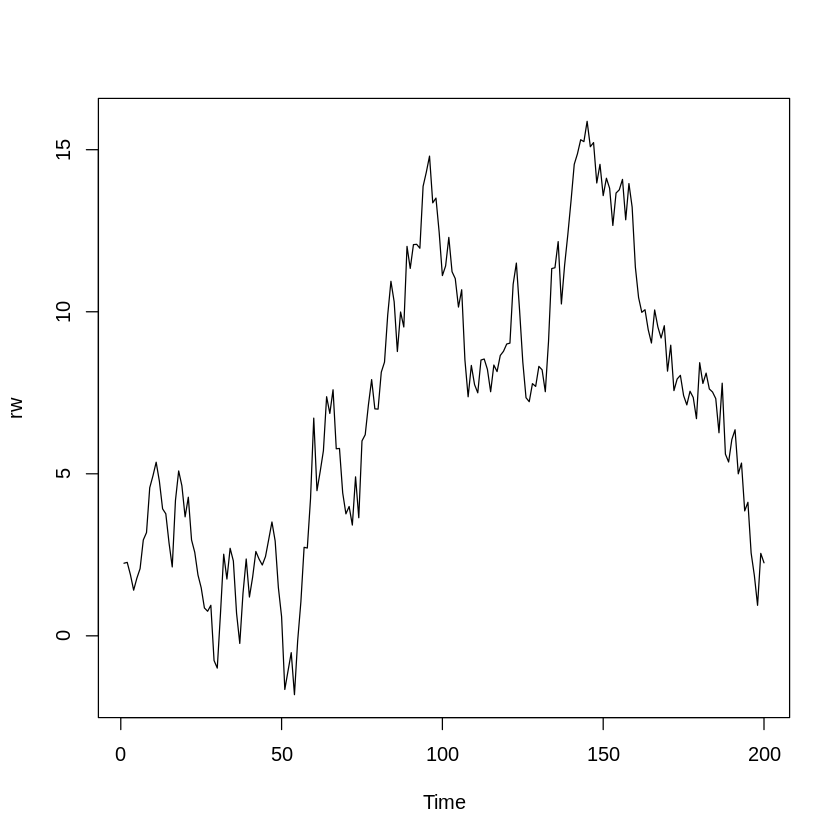

In [23]:
epsilon=rnorm(200,0,1)
rw=cumsum(epsilon)    ##ramdon-walk
plot.ts(rw)

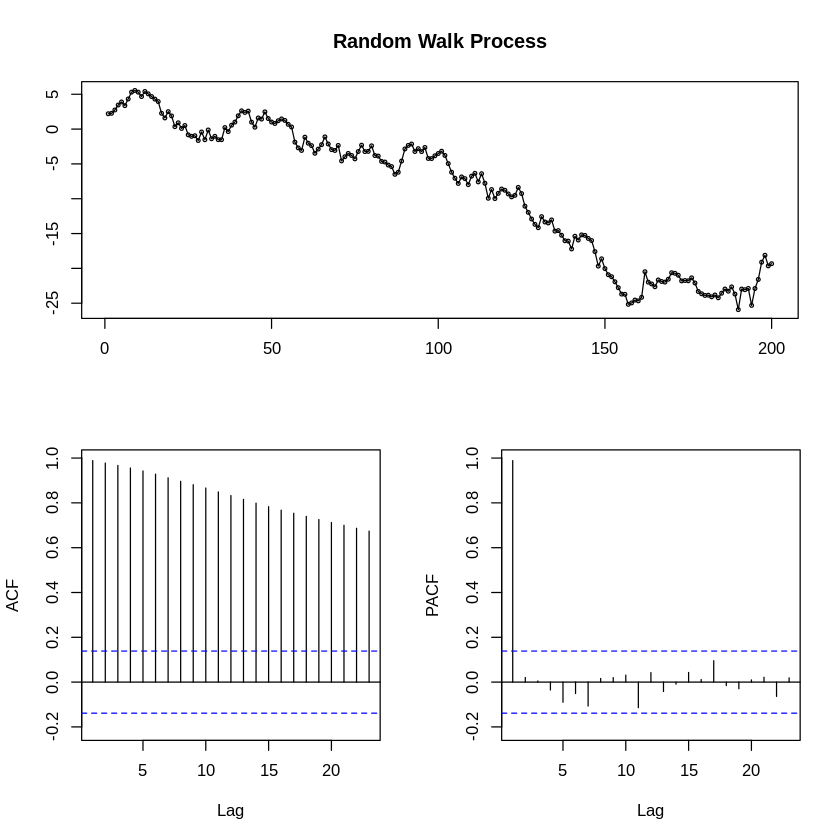

In [24]:
epsilon=rnorm(200,0,1)
rw=cumsum(epsilon)
forecast::tsdisplay(rw,main="Random Walk Process")

- 약간 추세가 존재하는 것 같은 느낌 => 확률적추세 -> ACF가 매우 천천히 감소함

### 절편이 있는 확률보행 과정

$Z_t=δ+ Z_{t-1}+ϵ_t=tδϵ_1+ϵ_2+...+ϵ_t,\; ϵ ~ WN(0,σ^2)$

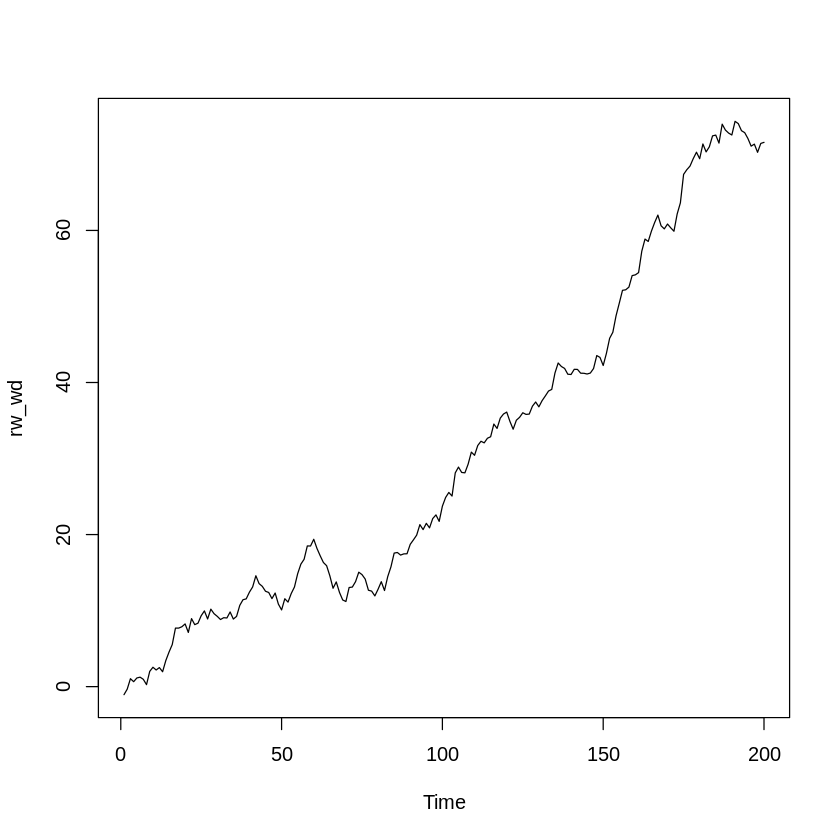

In [25]:
rw_wd=c()
delta=0.3
rw_wd[1]=delta+rnorm(1)
for(k in 2:200){
    rw_wd[k]=delta+rw_wd[k-1]+rnorm(1)
}
plot.ts(rw_wd)

### 여러가지 데이터에 대한 ACF PACF 그림

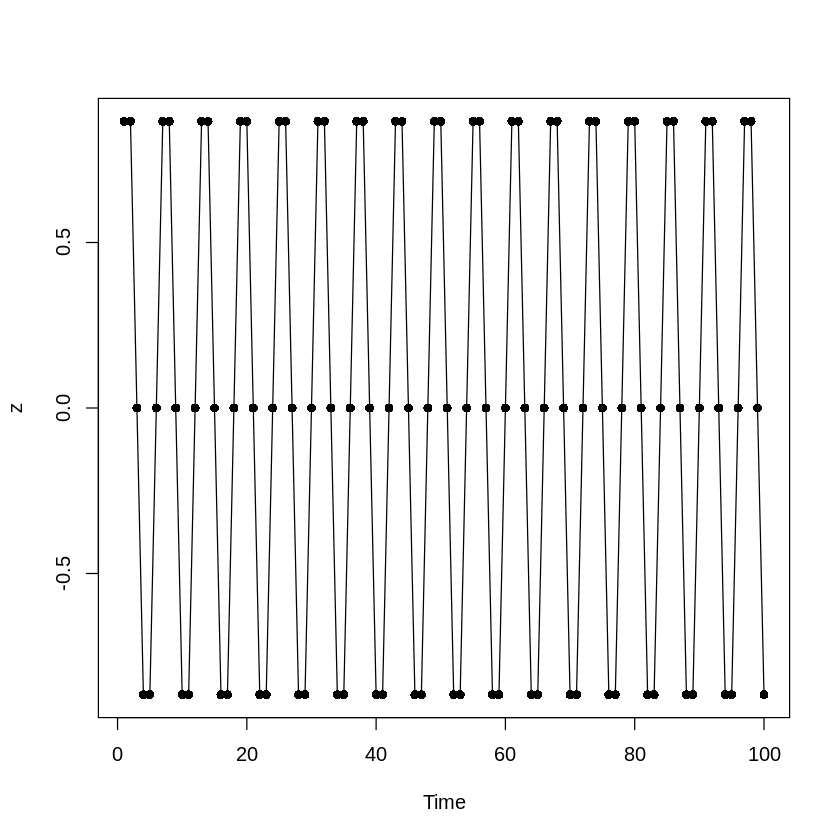

In [26]:
t=1:100
z=sin(t*pi/3)
plot.ts(z)
points(t,z,pch=16)

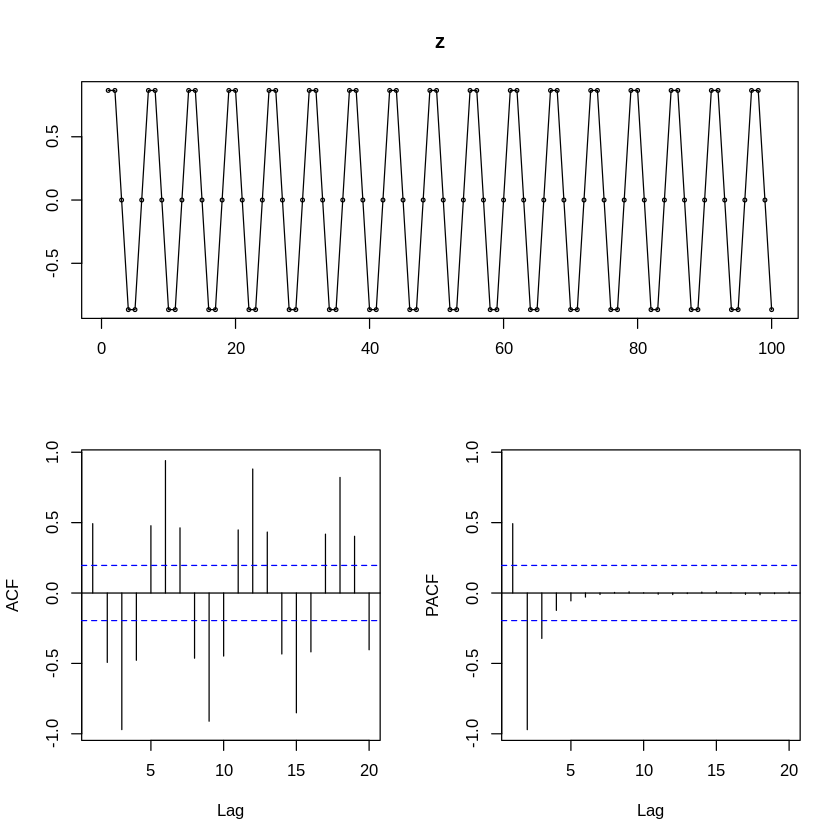

In [27]:
forecast::tsdisplay(z)

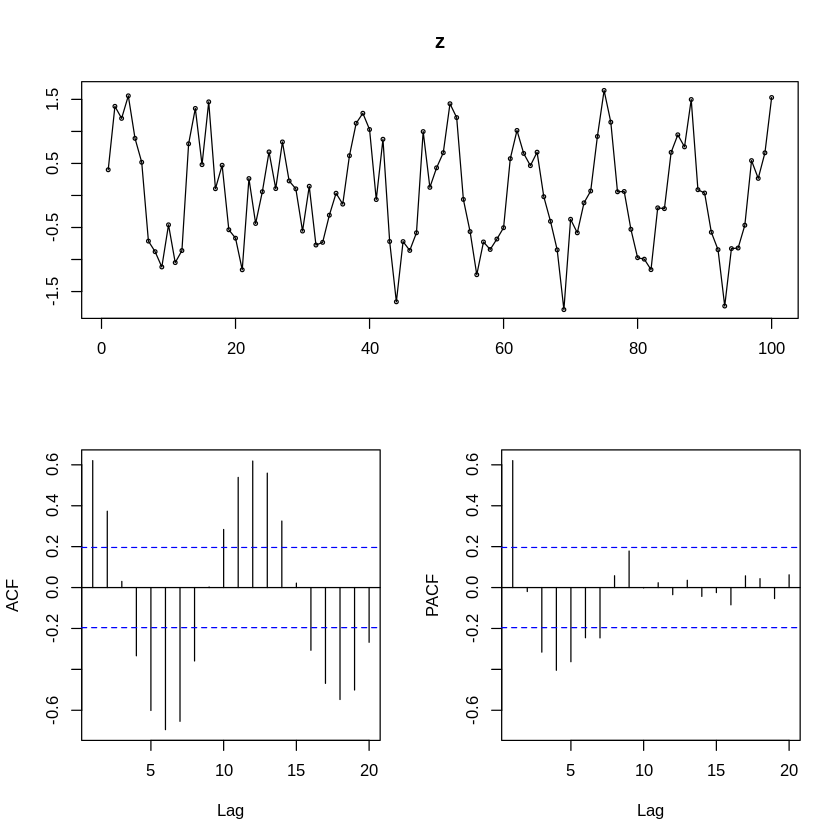

In [28]:
s=12
z=sin(2*t*pi/s)+rnorm(100,0,0.4)
forecast::tsdisplay(z)

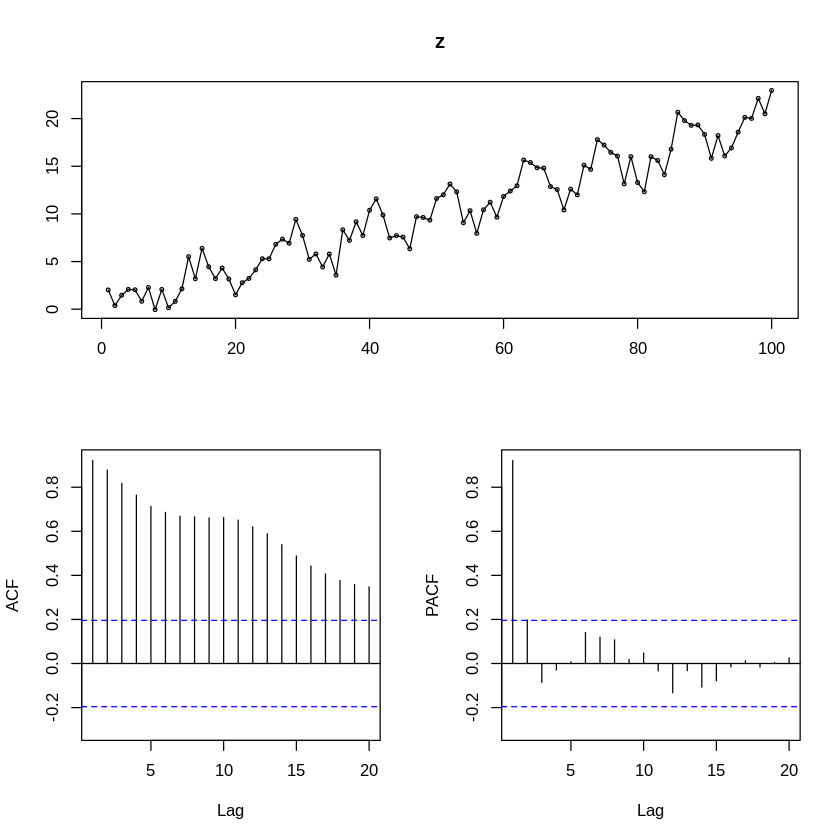

In [29]:
s=12
z=0.2*t+2*sin(2*t*pi/s)+rnorm(100,0,1.2)
forecast::tsdisplay(z)

- ACF가 감소하다가 약간증가하는 듯함.. -> 계절성분의 영향으로 인해

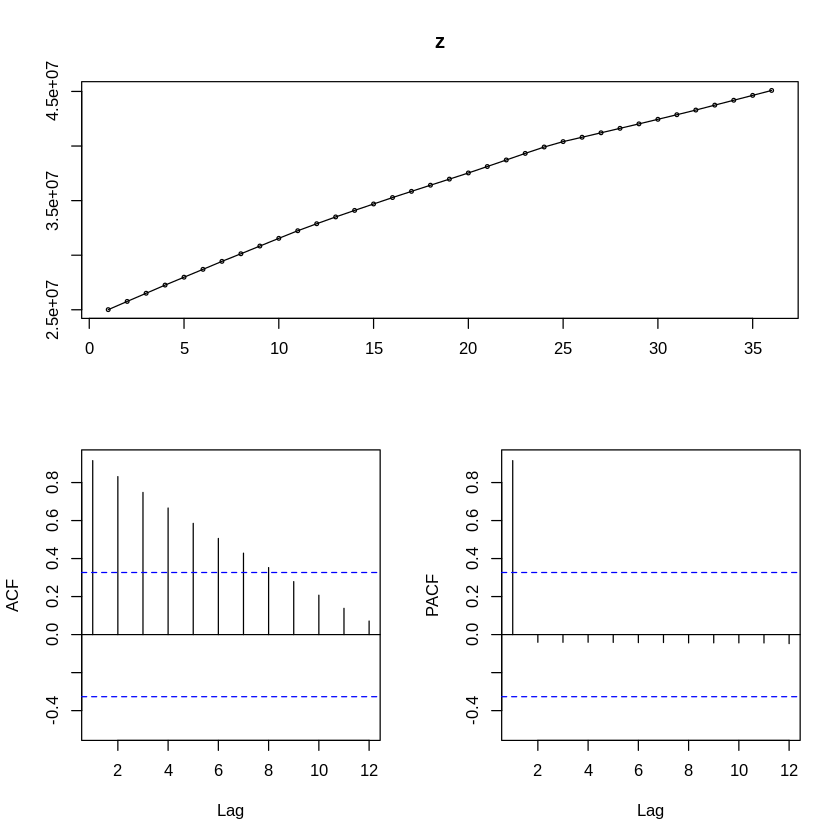

In [30]:
z=scan("population.txt")
forecast::tsdisplay(z)

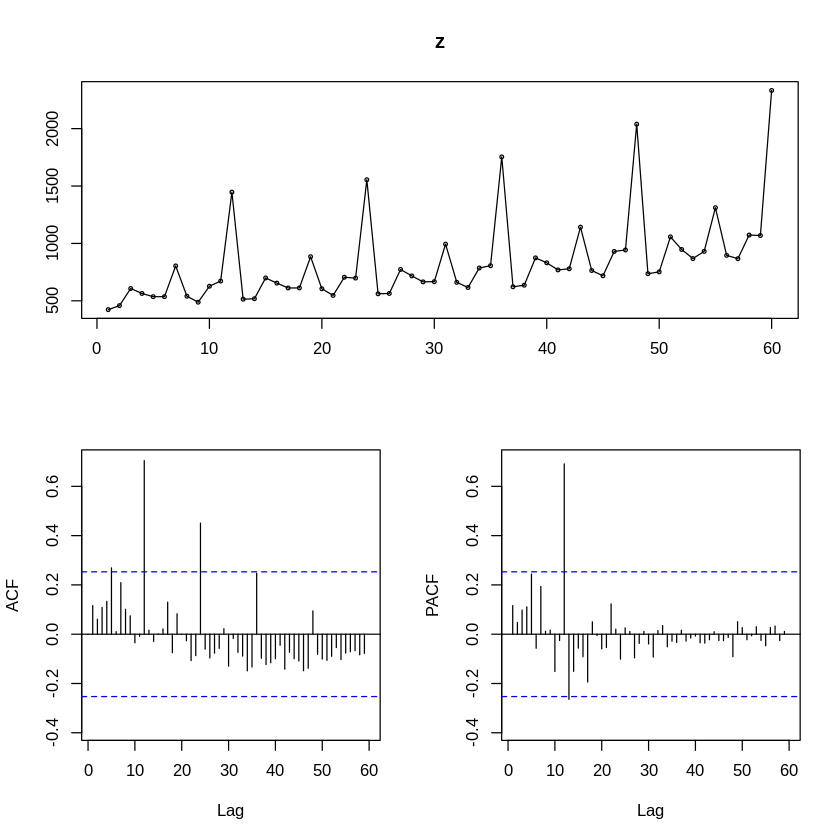

In [31]:
z=scan("depart.txt")
forecast::tsdisplay(z,lag.max=60)

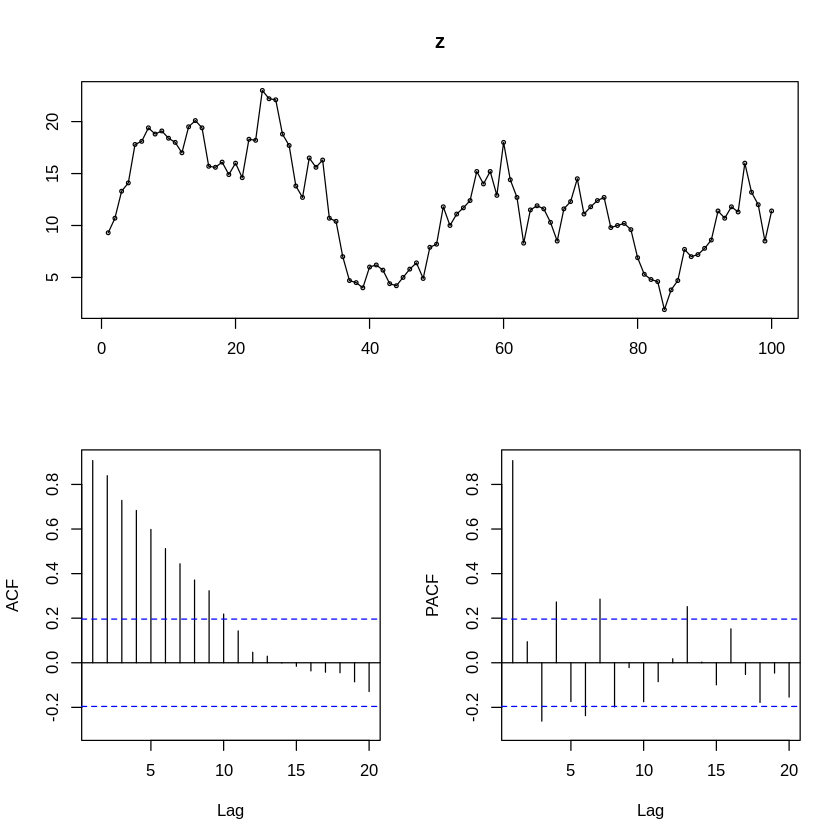

In [34]:
z=scan("mindex.txt")
forecast::tsdisplay(z)

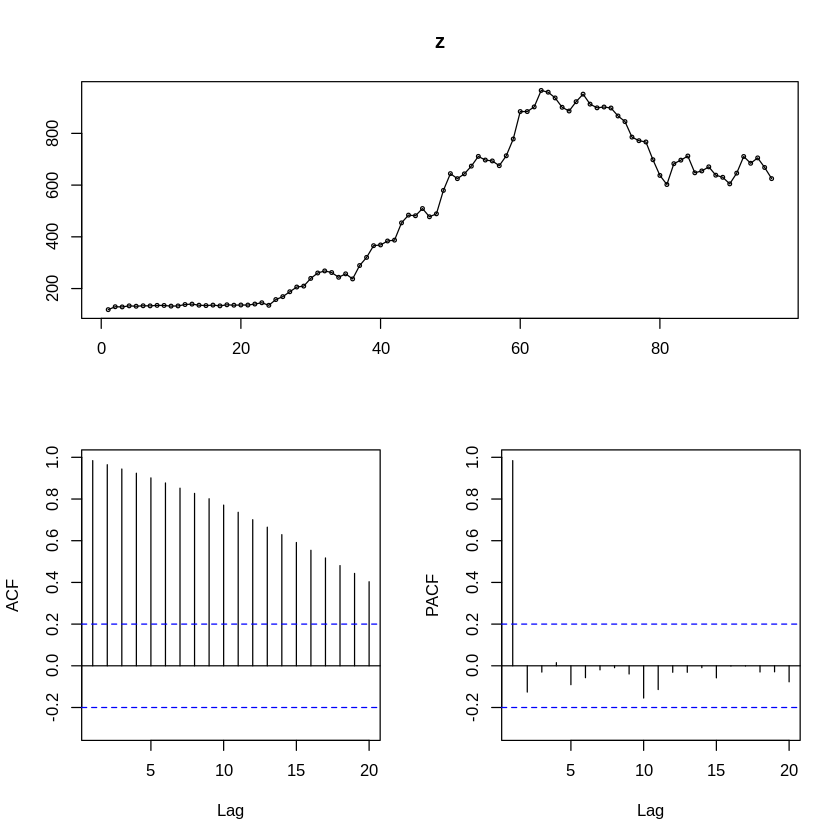

In [35]:
z=scan("stock.txt")
forecast::tsdisplay(z)

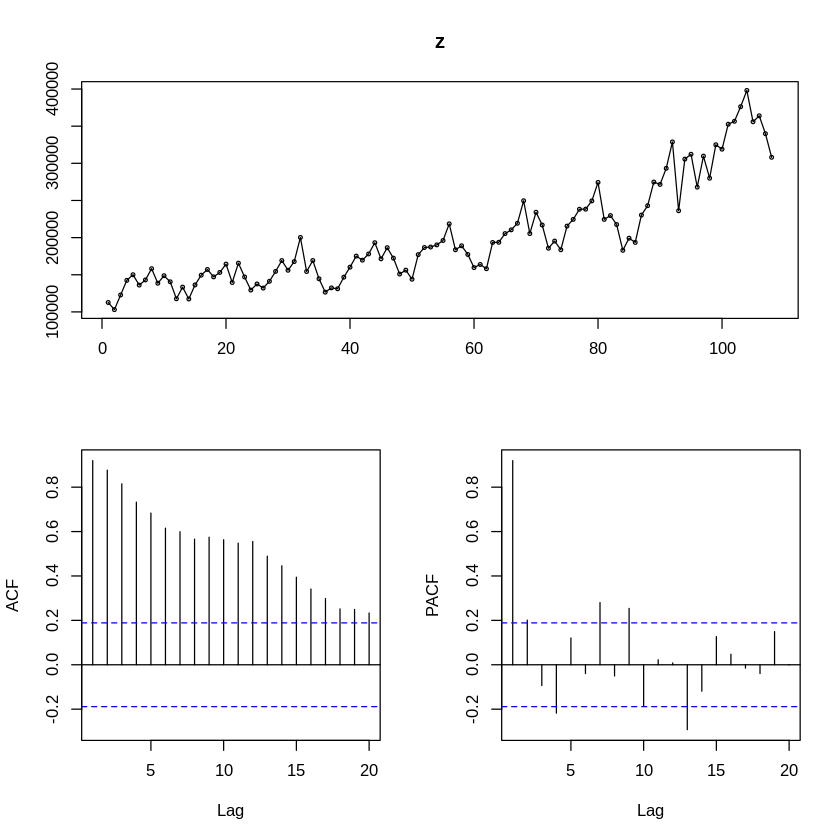

In [36]:
z=scan("koreapass.txt")
forecast::tsdisplay(z)

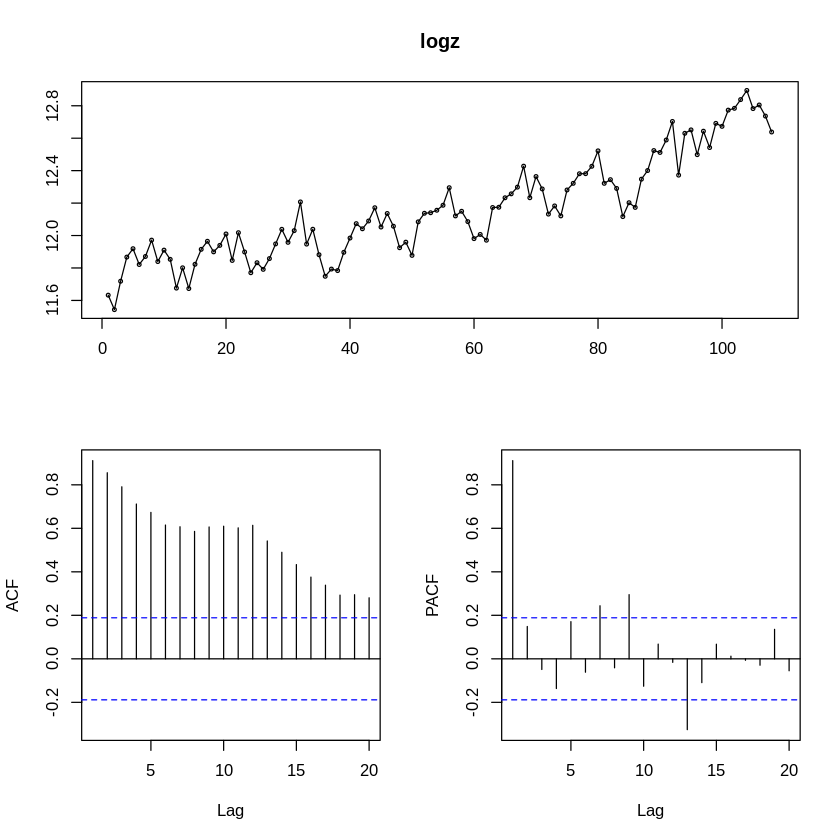

In [37]:
logz=log(z)
forecast::tsdisplay(logz)

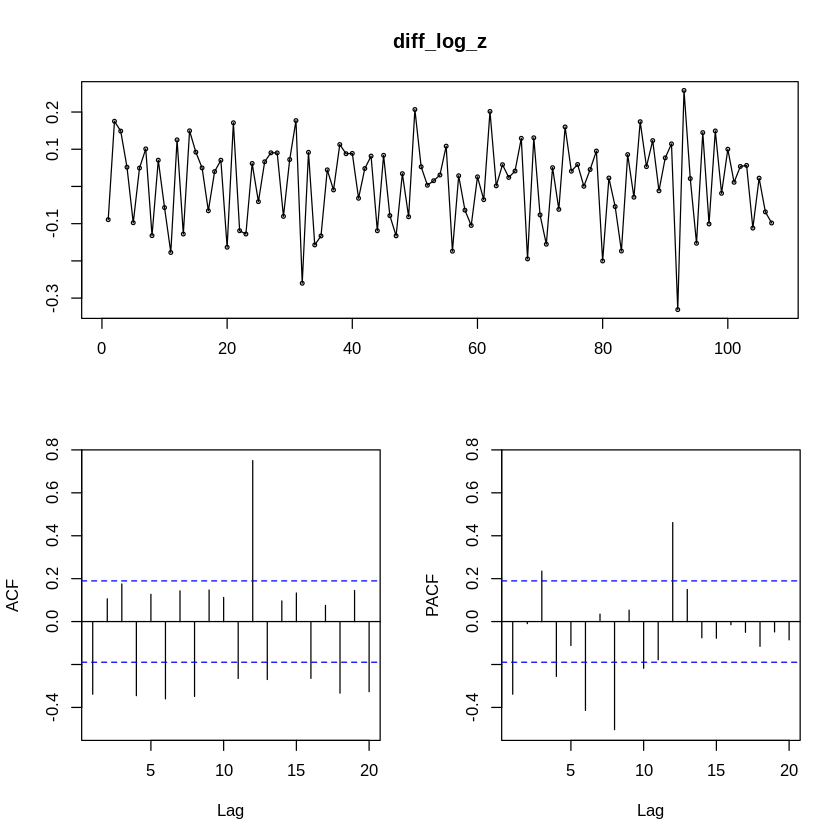

In [38]:
diff_log_z=diff(log(z))
forecast::tsdisplay(diff_log_z)

- ACF 그래프에서 계절성분때문에 12번째 값이 크게 나온 것을 알 수 있음

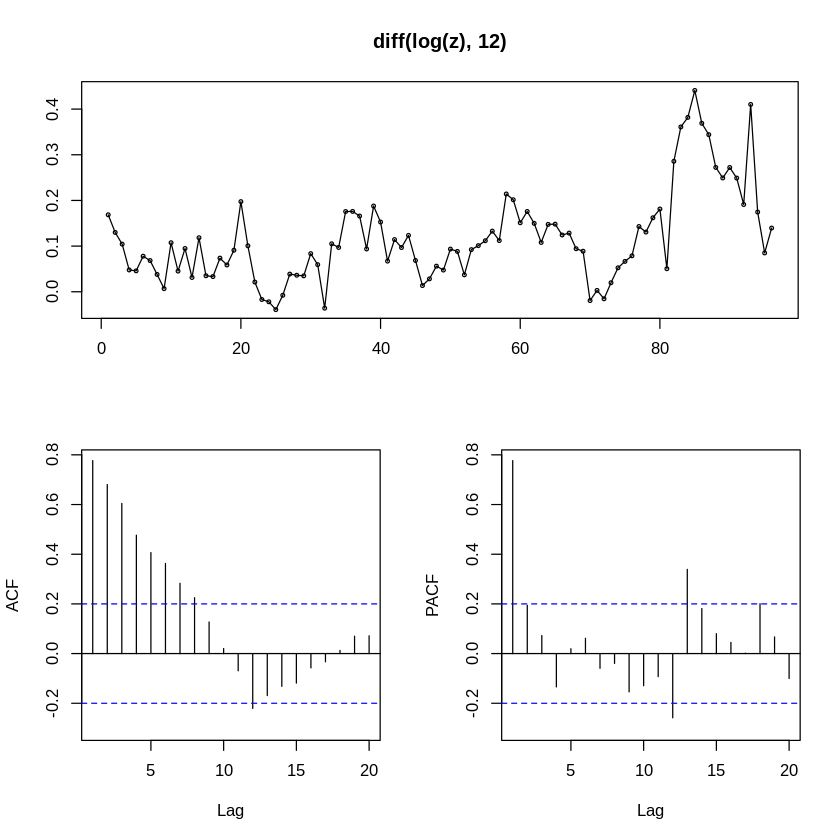

In [39]:
forecast::tsdisplay(diff(log(z),12))